In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


### Scenario 1: Predicting CO concentration

Y: True hourly averaged concentration CO in mg/m^3 (reference analyzer)
X: PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted), Temperature in °C, Relative Humidity (%), AH Absolute Humidity

In [89]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [90]:
'''Replacing missing values by mean value'''
# Replace -200 with NaN
df = df.replace(-200, np.nan)

# Fill NaN values with mean
df = df.fillna(df.mean())

C:\Users\Asus\AppData\Local\Temp/ipykernel_15644/1265506011.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
C:\Users\Asus\AppData\Local\Temp/ipykernel_15644/1265506011.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [92]:
X = df[['PT08.S1(CO)', 
        'T', 
        'RH', 
        'RH']].values

Y = df['CO(GT)'].values

In [93]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, Y_train)

# Predict using the test set
y_pred = lr_model.predict(X_test)

In [95]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(Y_test, y_pred)

In [96]:
print(f'r^2 = {r2} \n mse = {mse}')

r^2 = 0.6066851814313903 
 mse = 0.7302139339022341


In [97]:
# Create a PolynomialFeatures object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Fit and transform the features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a Linear Regression object and fit it on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

# Now you can use the trained model to make predictions
y_pred = poly_model.predict(X_test_poly)

In [98]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(Y_test, y_pred)

In [99]:
print(f'r^2 = {r2} \n mse = {mse}')

r^2 = 0.6379874240787846 
 mse = 0.672099332914911


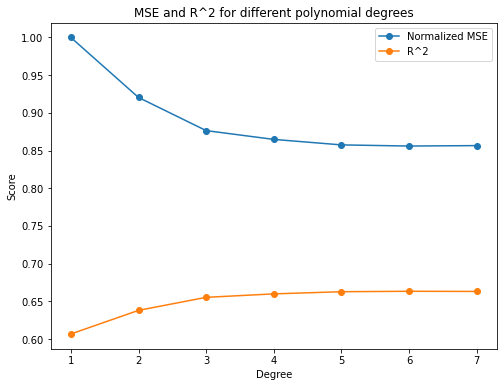

In [100]:
degrees = list(range(1, 8))
mse_values = []
r2_values = []

for degree in degrees:
    # Create a PolynomialFeatures object with the current degree
    poly_features = PolynomialFeatures(degree=degree)

    # Fit and transform the features to polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Create a Linear Regression object and fit it on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # Now you can use the trained model to make predictions
    y_pred = poly_model.predict(X_test_poly)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(Y_test, y_pred)
    r2_values.append(r2)

# Normalize MSE values for better visualization
mse_values = [i/max(mse_values) for i in mse_values]

plt.figure(figsize=(8,6))
plt.plot(degrees, mse_values, marker='o', label='Normalized MSE')
plt.plot(degrees, r2_values, marker='o', label='R^2')
plt.title('MSE and R^2 for different polynomial degrees')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()

plt.show()

### Scenario 2: Predicting Non Metanic HydroCarbons concentration

Y: True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
X: PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted), Temperature in °C, Relative Humidity (%), AH Absolute Humidity

In [49]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [50]:
'''Deleting the rows with missing value'''
# Replace -200 with NaN
df = df.replace(-200, np.nan)

# Drop rows with missing values
df = df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 1230
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           827 non-null    datetime64[ns]
 1   Time           827 non-null    object        
 2   CO(GT)         827 non-null    float64       
 3   PT08.S1(CO)    827 non-null    float64       
 4   NMHC(GT)       827 non-null    float64       
 5   C6H6(GT)       827 non-null    float64       
 6   PT08.S2(NMHC)  827 non-null    float64       
 7   NOx(GT)        827 non-null    float64       
 8   PT08.S3(NOx)   827 non-null    float64       
 9   NO2(GT)        827 non-null    float64       
 10  PT08.S4(NO2)   827 non-null    float64       
 11  PT08.S5(O3)    827 non-null    float64       
 12  T              827 non-null    float64       
 13  RH             827 non-null    float64       
 14  AH             827 non-null    float64       
dtypes: datetime64[ns](1), 

In [52]:
X = df[['PT08.S2(NMHC)', 
        'T', 
        'RH', 
        'RH']].values

Y = df['NMHC(GT)'].values

In [53]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, Y_train)

# Predict using the test set
y_pred = lr_model.predict(X_test)

In [55]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(Y_test, y_pred)

print(f'r^2 = {r2} \n mse = {mse}')

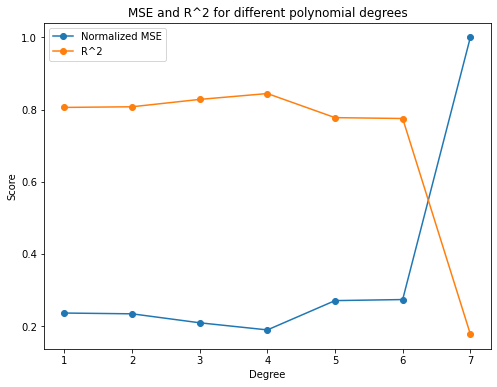

In [58]:
degrees = list(range(1, 8))
mse_values = []
r2_values = []

for degree in degrees:
    # Create a PolynomialFeatures object with the current degree
    poly_features = PolynomialFeatures(degree=degree)

    # Fit and transform the features to polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Create a Linear Regression object and fit it on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # Now you can use the trained model to make predictions
    y_pred = poly_model.predict(X_test_poly)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(Y_test, y_pred)
    r2_values.append(r2)

# Normalize MSE values for better visualization
mse_values = [i/max(mse_values) for i in mse_values]

plt.figure(figsize=(8,6))
plt.plot(degrees, mse_values, marker='o', label='Normalized MSE')
plt.plot(degrees, r2_values, marker='o', label='R^2')
plt.title('MSE and R^2 for different polynomial degrees')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()

plt.show()

### Scenario 3: Predicting NOx concentration

Y: True hourly averaged NOx concentration in ppb (reference analyzer)
X: PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted), Temperature in °C, Relative Humidity (%), AH Absolute Humidity

In [113]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [114]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [115]:
'''using interpolation for dealing with missing value, which is -200'''
# Convert -200 (missing values) to NaN
df = df.replace(-200, np.nan)

In [119]:
# Convert 'Time' to timedelta
df['Time'] = pd.to_timedelta(df['Time'].astype(str))

# Add 'Date' and 'Time' columns
df['DateTime'] = df['Date'] + df['Time']

# Set 'DateTime' as the index of the DataFrame
df.set_index('DateTime', inplace=True)

In [121]:
# Drop the 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [123]:
# Interpolate missing values using the 'linear' method
df.interpolate(method='linear', inplace=True)

In [124]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,275.0,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04 11:00:00,2.4,1162.50,275.0,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04 12:00:00,2.4,1142.00,275.0,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [126]:
X = df[['PT08.S3(NOx)', 
        'T', 
        'RH', 
        'AH']].values

Y = df['NO2(GT)'].values

In [128]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, Y_train)

# Predict using the test set
y_pred = lr_model.predict(X_test)

In [130]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(Y_test, y_pred)

print(f'r^2 = {r2} \n mse = {mse}')

r^2 = 0.6317641015287383 
 mse = 767.7988267741827


In [134]:
degrees = list(range(1, 8))
mse_values = []
r2_values = []

for degree in degrees:
    # Create a PolynomialFeatures object with the current degree
    poly_features = PolynomialFeatures(degree=degree)

    # Fit and transform the features to polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Create a Linear Regression object and fit it on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # Now you can use the trained model to make predictions
    y_pred = poly_model.predict(X_test_poly)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(Y_test, y_pred)
    r2_values.append(r2)
    
    print(f'degree = {degree} \n r^2 = {r2} \n mse = {mse}')

degree = 1 
 r^2 = 0.6317641015287383 
 mse = 767.7988267741827
degree = 2 
 r^2 = 0.6892986639410947 
 mse = 647.8350489280617
degree = 3 
 r^2 = 0.7002357050970822 
 mse = 625.0305168256505
degree = 4 
 r^2 = 0.7028050005783566 
 mse = 619.6733475101424
degree = 5 
 r^2 = 0.7116826737936828 
 mse = 601.1627484416924
degree = 6 
 r^2 = 0.2440762221982017 
 mse = 1576.1564587712917
degree = 7 
 r^2 = -86890.55493012466 
 mse = 181175258.05849928


### Scenario 4: Predicting NO2 concentration

Y: True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
X: PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted), Temperature in °C, Relative Humidity (%), AH Absolute Humidity

In [135]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [136]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [138]:
# Convert 'Time' to timedelta
df['Time'] = pd.to_timedelta(df['Time'].astype(str))

# Add 'Date' and 'Time' columns
df['DateTime'] = df['Date'] + df['Time']

# Set 'DateTime' as the index of the DataFrame
df.set_index('DateTime', inplace=True)

In [139]:
# Drop the 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [140]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Apply the imputer
df_imputed = df.copy(deep=True)
df_imputed.iloc[:, :] = mice_imputer.fit_transform(df)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [142]:
df_imputed

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,264.886874,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04 11:00:00,2.4,1162.50,264.351875,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04 12:00:00,2.4,1142.00,326.342135,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


Scenario 4: Predicting NO2 concentration¶
X: PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted), Temperature in °C, Relative Humidity (%), AH Absolute Humidity

In [149]:
X = df_imputed[['PT08.S4(NO2)', 
        'T', 
        'RH', 
        'AH']].values

Y = df_imputed['PT08.S5(O3)'].values

In [150]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [151]:
# Create a linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, Y_train)

# Predict using the test set
y_pred = lr_model.predict(X_test)

In [152]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(Y_test, y_pred)

print(f'r^2 = {r2} \n mse = {mse}')

r^2 = 0.6063815239670476 
 mse = 62458.5134448609


In [153]:
degrees = list(range(1, 8))
mse_values = []
r2_values = []

for degree in degrees:
    # Create a PolynomialFeatures object with the current degree
    poly_features = PolynomialFeatures(degree=degree)

    # Fit and transform the features to polynomial features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Create a Linear Regression object and fit it on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)

    # Now you can use the trained model to make predictions
    y_pred = poly_model.predict(X_test_poly)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, y_pred)
    mse_values.append(mse)

    # Calculate the coefficient of determination (R^2)
    r2 = r2_score(Y_test, y_pred)
    r2_values.append(r2)
    
    print(f'degree = {degree} \n r^2 = {r2} \n mse = {mse}')

degree = 1 
 r^2 = 0.6063815239670476 
 mse = 62458.513444860895
degree = 2 
 r^2 = 0.6498863540911933 
 mse = 55555.26275243694
degree = 3 
 r^2 = 0.6647365793608486 
 mse = 53198.86169115564
degree = 4 
 r^2 = 0.6695099160576887 
 mse = 52441.43912994567
degree = 5 
 r^2 = 0.6671480383615291 
 mse = 52816.2166844128
degree = 6 
 r^2 = 0.6472424966855996 
 mse = 55974.784226575626
degree = 7 
 r^2 = -0.023740098158033573 
 mse = 162444.82558154565
